**Calculating free energy and probabilities**

In [1]:
from IPython.display import SVG
import RNA
import math
import random
import src.path_finding as pf
import src.evolution as ev

%load_ext autoreload
%autoreload 2

In [2]:
# Create a fold compound for an RNA sequence
seq = "GGGGAAACUCC"
fc = RNA.fold_compound(seq)

# Define a test structure (dot-bracket notation)
struct = "(..(...)..)"
end_struct = "...((...))."  # target structure

# Evaluate the free energy of the structure
energy = fc.eval_structure(struct)
print("Free energy: {:.2f} kcal/mol".format(energy))

Free energy: 6.40 kcal/mol


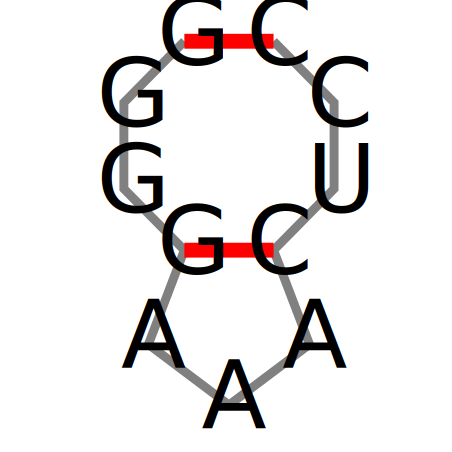

In [3]:
RNA.svg_rna_plot(seq, structure=struct, ssfile="tmp.svg")
SVG("tmp.svg")

In [4]:
pf.generate_moves(seq, struct)

[('...(...)...', 'remove', (1, 11)),
 ('(.........)', 'remove', (4, 8)),
 ('((.(...)).)', 'add', (2, 9)),
 ('((.(...).))', 'add', (2, 10)),
 ('(.((...)).)', 'add', (3, 9)),
 ('(.((...).))', 'add', (3, 10))]

In [5]:
moves = pf.generate_moves(seq, struct)
pf.move_probabilities(moves, end_struct, fc)

[0.08608985688346939,
 0.04661546539489305,
 0.00018652310049550693,
 0.7835579990319391,
 0.07614960315116505,
 0.007400552438037912]

In [6]:
# Create the ViennaRNA fold compound for our sequence.
fc = RNA.fold_compound(seq)
init_struct = struct

# 1) Generate all one-base moves
moves = pf.generate_moves(seq, init_struct)
print("Generated Moves:")
for m in moves:
    print(m)

# 2) Compute probabilities for each move based on Boltzmann law
probs = pf.move_probabilities(moves, end_struct, fc)
print("\nMove Probabilities:")
for m, p in zip(moves, probs):
    print(f"Move: {m[1]} at positions {m[2]}, Structure: {m[0]}, Probability: {p:.4f}")

# 3) Randomly select the next structure using the computed probabilities
next_struct, move_info = pf.select_next_structure(seq, init_struct, end_struct, fc)
print("\nSelected Next Structure:")
print("Structure:", next_struct)
print("Move Info:", move_info)

Generated Moves:
('...(...)...', 'remove', (1, 11))
('(.........)', 'remove', (4, 8))
('((.(...)).)', 'add', (2, 9))
('((.(...).))', 'add', (2, 10))
('(.((...)).)', 'add', (3, 9))
('(.((...).))', 'add', (3, 10))

Move Probabilities:
Move: remove at positions (1, 11), Structure: ...(...)..., Probability: 0.0861
Move: remove at positions (4, 8), Structure: (.........), Probability: 0.0466
Move: add at positions (2, 9), Structure: ((.(...)).), Probability: 0.0002
Move: add at positions (2, 10), Structure: ((.(...).)), Probability: 0.7836
Move: add at positions (3, 9), Structure: (.((...)).), Probability: 0.0761
Move: add at positions (3, 10), Structure: (.((...).)), Probability: 0.0074

Selected Next Structure:
Structure: ((.(...).))
Move Info: ('add', (2, 10))


In [7]:
# Example data:
seq = "GGGGAAACUCC"
start_struct = "(..(...)..)"
end_struct = "...((...))."  # target structure

# Create a fold compound for the sequence (ViennaRNA initialization)
fc = RNA.fold_compound(seq)

# 1. Initialize population of size N
N = 100
population = ev.init_population(seq, start_struct, N)

# Let's run evolution for a number of steps and print progress
max_steps = 100
step = 0
print("Generation 0:")
# for ind in population:
#     d = structure_distance(ind['structure'], end_struct)
#     print(f"Structure: {ind['structure']}, Distance: {d}")

while step<max_steps and ev.compute_barrier(population) is None:
    step += 1
    population = ev.evolve_population_inclusive(population, seq, fc, start_struct, end_struct)
    # For reporting, update distances and print
    print(f"\nGeneration {step}:")
    #for ind in population:
        #print(f"Structure: {ind['structure']}, Distance: {ind['distance']}, Move: {ind['move_info']}")

# Optionally, report the best candidate at the final generation:
best = min(population, key=lambda ind: ind['distance'])
print("\nBest candidate after evolution:")
print(f"Structure: {best['structure']}, Distance: {best['distance']}, Energy barrier: {best['highest_energy']} kcal/mol")
print(f"Energy barrier: {ev.compute_barrier(population)} kcal/mol")

Generation 0:

Generation 1:

Generation 2:

Generation 3:

Generation 4:

Generation 5:

Generation 6:

Generation 7:

Generation 8:

Generation 9:

Generation 10:

Generation 11:

Generation 12:

Generation 13:

Best candidate after evolution:
Structure: ...((...))., Distance: 0, Energy barrier: 0 kcal/mol
Energy barrier: 0 kcal/mol


In [8]:
# Example data 2:
seq = "ACACGACCUCAUAUAAUCUUGGGAAUAUGGCCCAUAAGUUUCUACCCGGCAACCGUAAAUUGCCGGACUAUGCAGGGAAGUG"
start_struct = "......................(....................)....(.............)..................."
end_struct = ".(((..(((((((......((((.......))))...........(((((((.......)))))))..)))).)))...)))"  # target structure

# Create a fold compound for the sequence (ViennaRNA initialization)
fc = RNA.fold_compound(seq)

# 1. Initialize population of size N
N = 100
population = ev.init_population(seq, start_struct, N)

max_steps = 500
step = 0
print("Generation 0:")
# for ind in population:
#     d = structure_distance(ind['structure'], end_struct)
#     print(f"Structure: {ind['structure']}, Distance: {d}")

while step<max_steps and ev.compute_barrier(population) is None:
    step += 1
    population = ev.evolve_population_inclusive(population, seq, fc, start_struct, end_struct)
    # For reporting, update distances and print
    print(f"\nGeneration {step}:")
    print(population[0])
    #for ind in population:
        #print(f"Structure: {ind['structure']}, Distance: {ind['distance']}, Move: {ind['move_info']}")

best = min(population, key=lambda ind: ind['distance'])
print("\nBest candidate after evolution:")
print(f"Structure: {best['structure']}, Distance: {best['distance']}, Energy barrier: {best['highest_energy']} kcal/mol")
print(f"Number of steps necessary to reach the target structure: {step}")

Generation 0:

Generation 1:
{'structure': '......................(....................)...((.............))..................', 'distance': 38, 'highest_energy': 0, 'path': ['......................(....................)....(.............)...................', '......................(....................)...((.............))..................'], 'energy_profile': [0, 7.699999809265137]}

Generation 2:
{'structure': '...............................................((.............))..................', 'distance': 38, 'highest_energy': 0, 'path': ['......................(....................)....(.............)...................', '......................(....................)...((.............))..................', '...............................................((.............))..................'], 'energy_profile': [0, 7.699999809265137, 0.8999999761581421]}

Generation 3:
{'structure': '...............................................(((...........)))..................', 'distance': 3

Ideas:
- Change the temperature
- Do transfer learning
- Add a penalty based on distance and/or energy

In [9]:
ev.best_folding(seq, end_struct, start_struct, N=100, max_steps=100, alpha=0.3, T=pf.T_CONST, beta=10)


Generation 10:
{'structure': '......((............(((.......)))............((((((.........))))))........))......', 'distance': 20, 'highest_energy': 9.199999809265137, 'path': ['.(((..(((((((......((((.......))))...........(((((((.......)))))))..)))).)))...)))', '.(((..(((((((.......(((.......)))............(((((((.......)))))))..)))).)))...)))', '.(((..((((((........(((.......)))............(((((((.......)))))))...))).)))...)))', '.(((..(((((.........(((.......)))............(((((((.......)))))))....)).)))...)))', '.(((..(((((.........(((.......)))............((((((.........))))))....)).)))...)))', '.(((..((((..........(((.......)))............((((((.........)))))).....).)))...)))', '.(((..(((...........(((.......)))............((((((.........)))))).......)))...)))', '..((..(((...........(((.......)))............((((((.........)))))).......)))...)).', '...(..(((...........(((.......)))............((((((.........)))))).......)))...)..', '......(((...........(((.......)))............((

({'structure': '................................................(.............)...................',
  'distance': 2,
  'highest_energy': 30.399999618530273,
  'path': ['.(((..(((((((......((((.......))))...........(((((((.......)))))))..)))).)))...)))',
   '.(((..(((((((......((((.......))))...........((((((.........))))))..)))).)))...)))',
   '.(((..((((((.......((((.......))))...........((((((.........))))))...))).)))...)))',
   '.(((..((((((........(((.......)))............((((((.........))))))...))).)))...)))',
   '.(.(..((((((........(((.......)))............((((((.........))))))...))).)))...).)',
   '...(..((((((........(((.......)))............((((((.........))))))...))).)))...)..',
   '......((((((........(((.......)))............((((((.........))))))...))).)))......',
   '......((((((........(((.......)))............(((((...........)))))...))).)))......',
   '......(((((.........(((.......)))............(((((...........)))))....)).)))......',
   '......((((..........(((......